In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [7]:
df.shape

(1000, 3)

In [3]:
#!pip install tensorflow

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


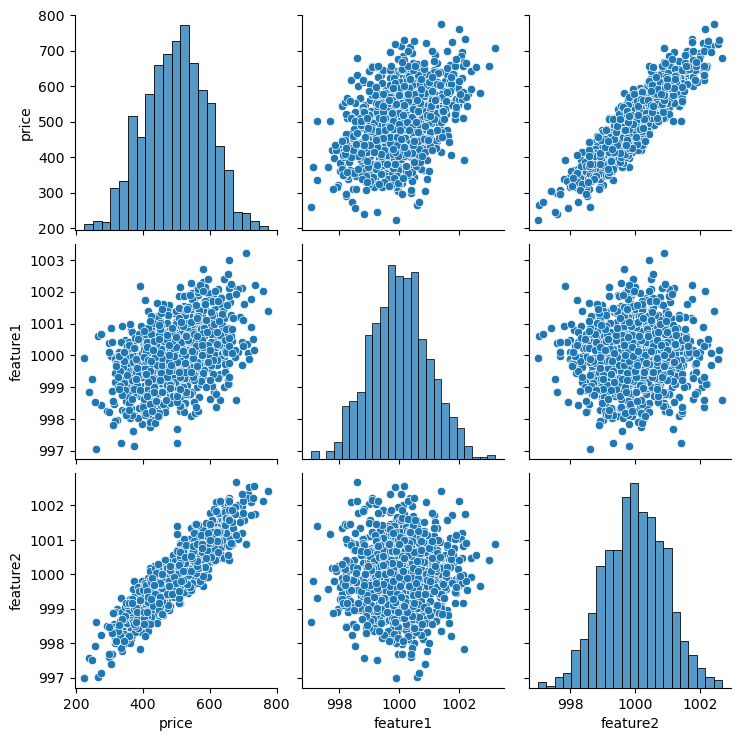

In [4]:
import seaborn as sns
sns.pairplot(df)

### Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [32]:
#Convert pandas Series/DF to Numpy arrays for Kerras
#Features
X = df[['feature1','feature2']].values
#Label
y=df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

#### Scaling the Data

In [33]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [34]:
sc.fit(X_train)

sc_X_train = sc.transform(X_train)
sc_X_test = sc.transform(X_test)

In [35]:
import tensorflow as tf

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [37]:
#help(Sequential)

### Creating a Model


Two ways to create models through TF

1. Pass in a list of layers all at once
2. add layers one by one

## Model as a list of layers

In [38]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

#### Model by adding layers one by one

In [39]:
model = Sequential()
model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

In [40]:
model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

#Final output node for prediction
model.add(Dense(1))

model.compile(loss = 'mse',optimizer='rmsprop')

1. Sample: one element of a dataset
2. Batch: a set of N Samples
3. Epoch: "one pass over the entire dataset"

In [44]:
model.fit(sc_X_train,y_train,epochs=250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 254317.8906
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 252412.5938
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 251994.3125
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 253781.4062
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 258338.1094
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 258220.8281
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 252202.7500
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 255236.3750
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 253087.2969
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 253030.0469
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 250994.9375
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 250298.2031
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 254784.3750
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 340u

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

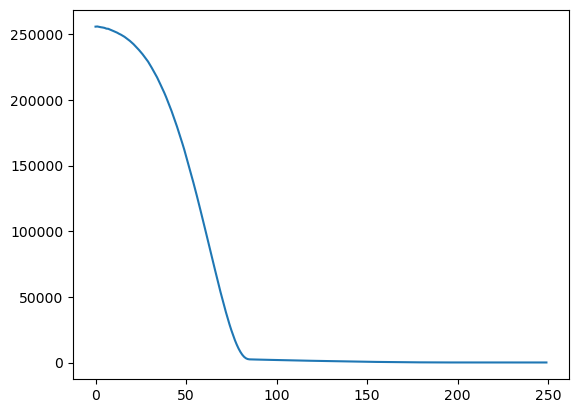

In [45]:
losses = model.history.history['loss']
sns.lineplot(x=range(len(losses)),y=losses)

#### Compare Final Evaluation (MSE) on both training and test set

In [46]:
model.metrics_names

['loss']

In [47]:
model.evaluate(sc_X_train,y_train,verbose=0)

24.440223693847656

In [48]:
model.evaluate(sc_X_test,y_test,verbose=0)

27.094161987304688

### Futher Metrics

In [51]:
test_predictions = model.predict(sc_X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step


In [52]:
test_predictions

array([[406.22632],
       [624.93134],
       [593.4591 ],
       [573.50836],
       [367.4676 ],
       [580.4778 ],
       [516.2134 ],
       [460.15848],
       [550.4795 ],
       [448.54688],
       [613.15314],
       [550.1869 ],
       [420.065  ],
       [409.81274],
       [652.69666],
       [438.3041 ],
       [509.6082 ],
       [661.3952 ],
       [664.05505],
       [566.81036],
       [335.0136 ],
       [445.85275],
       [383.4138 ],
       [379.63657],
       [567.86804],
       [611.9546 ],
       [533.5919 ],
       [428.84457],
       [656.89984],
       [415.03857],
       [443.6528 ],
       [486.2313 ],
       [439.42062],
       [683.3597 ],
       [425.73853],
       [418.64682],
       [503.07114],
       [551.7155 ],
       [510.8844 ],
       [396.2686 ],
       [619.97406],
       [417.59036],
       [605.80255],
       [446.9852 ],
       [503.1276 ],
       [583.0262 ],
       [670.492  ],
       [491.5192 ],
       [319.33728],
       [486.53088],


In [54]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [55]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [57]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test_Y','Model Predictions']
pred_df

,Test_Y,Model Predictions
0,402.296319,406.226318
1,624.156198,624.931335
2,582.455066,593.459106
3,578.588606,573.508362
4,371.224104,367.467590
...,...,...
295,525.704657,530.237488
296,502.909473,516.489502
297,612.727910,611.014954
298,417.569725,417.918243


<Axes: xlabel='Test_Y', ylabel='Model Predictions'>

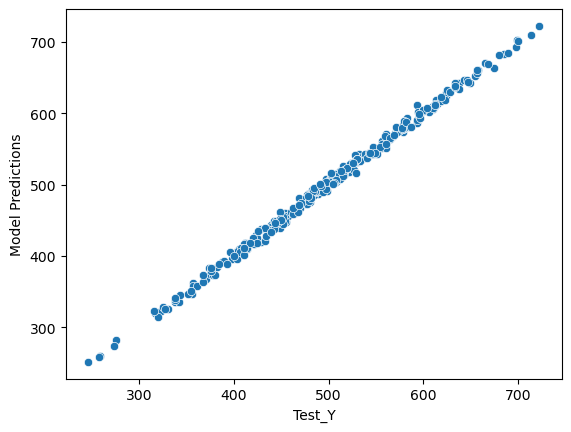

In [58]:
sns.scatterplot(x = 'Test_Y',y='Model Predictions',data=pred_df)

In [59]:
pred_df['error'] = pred_df['Test_Y']-pred_df['Model Predictions']

In [60]:
pred_df.head(1)

,Test_Y,Model Predictions,error
0,402.296319,406.226318,-3.93


/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


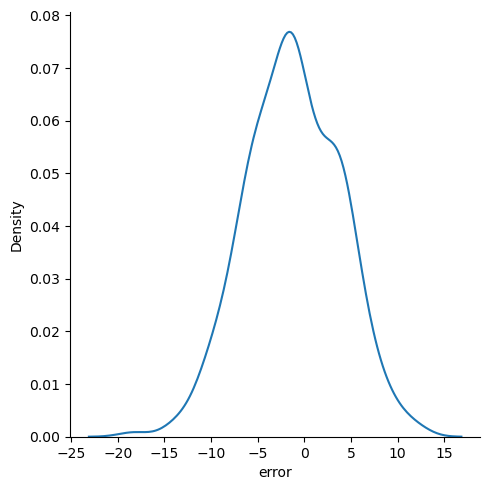

In [63]:
sns.displot(pred_df['error'], kind='kde')

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [65]:
mean_absolute_error(pred_df['Test_Y'],pred_df['Model Predictions'])

4.176270838787139

In [66]:
mean_squared_error(pred_df['Test_Y'],pred_df['Model Predictions'])

26.54316721684674

In [67]:
26.54316721684674**0.5

5.152006135171691

### Predict on brand new data

In [74]:
new_stone = [[998,1000],[981,1003]]

In [75]:
sc.transform(new_stone)

array([[ 0.14117652,  0.53968792],
       [-2.66223845,  1.07859461]])

In [76]:
model.predict(sc.transform(new_stone))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[420.6487  ],
       [ 72.945755]], dtype=float32)

### Saving and Loading a Model

In [77]:
from tensorflow.keras.models import load_model

In [78]:
model.save('demo_model.keras')

In [79]:
mod1 = load_model('demo_model.keras')
mod1.predict(sc.transform([[999,1001]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[549.47516]], dtype=float32)